# Scaling 
Scaling is a technique that scales different values on a same level 

|Technique|Formula|
|---|---|
|Standard Scaler/Z-Score Normalization|$$x_{i_{scaled}} = \frac {x_i - \mu}{\sigma}$$|
|Min-Max Scaler|$$x_{i_{scaled}} = \frac {x_i - min}{max - min}$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sample-data/Sample_Data_1.csv
/kaggle/input/sample-data/Sample_Data_2.csv
/kaggle/input/sample-data/Sample_Data_3.csv


Suppose we have a dataset like this 

In [4]:
data = pd.read_csv("/kaggle/input/sample-data/Sample_Data_1.csv")

In [5]:
data["y"] = data["y"] * 100

In [6]:
data

,x,y,z
0,-33.963989,23196.201395,a
1,34.152445,20670.838779,a
2,7.545619,19162.201911,a
3,6.862322,25688.208651,a
4,-5.574613,20972.540156,a
...,...,...,...
1158,630.098767,35236.798299,b
1159,654.050088,41201.063865,b
1160,709.733033,39161.022616,b
1161,623.373461,40586.175795,b


And it looks like this 

<AxesSubplot:xlabel='x', ylabel='y'>

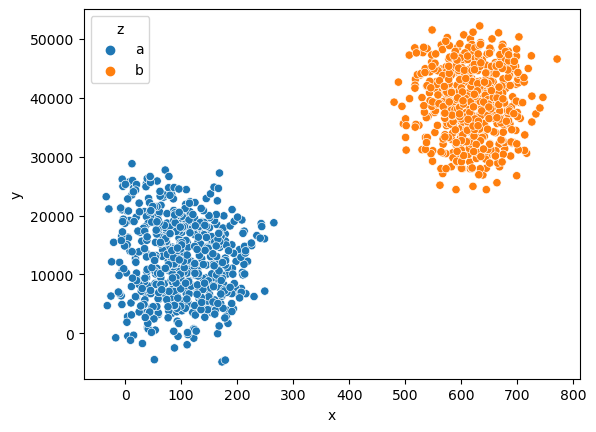

In [7]:
sns.scatterplot(x = data["x"] , y = data["y"] , hue = data["z"])

Notice the diffrence in the axis... One is in the range of $(0-800)$ and the other one is in the range of $(0-50,000)$. This shows that mathematlically the output will be more dependent on the `data[1]` than `data[0]`. And this is a wrong signal. Just take this example.

For the KNN only, the distance for $x-axis$ will be way small than the distance for $y-axis$. 

To counter this we use different types of `Scalers`. A scaler is baiscally a technique that scales all the values of a data to a particular scale, for more efficicent computation. 

So what thing defines a good scaled data...?

Its the $mean = \mu$ and $standard_-deviation = \sigma$ of the data. 

A good scaled data will have $\mu = 0$ and $\sigma = 1$

If you go out to your nearby machine learning shop and ask them for scalers, they wil show you a lot of scalers, but will also show you most commonly used scalers in the market differently. Those scalers will be most probably be 
* **[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**

# 1 | Standard Scaler | Z-Score Normalization

One technique we can apply is to use the formula like this 

****
$$x_{i_{scaled}} = \frac {x_i - \mu}{\sigma}$$

$where$

$\mu = \frac {1}{n}\sum\limits_{i = 1}^{n}x_i$

$\sigma = \sqrt{\frac {1}{n}\sum\limits_{i = 1}^{n}(x_i - \mu)^2}$
****

Lets assume we have an array like this 

In [8]:
x = np.random.randn(100)

In [9]:
x

array([ 0.7252663 , -0.48834243, -0.04742216, -1.0166644 ,  1.65809746,
       -2.06544101,  0.47966156,  0.36272154,  0.67302048,  0.43227184,
       -2.24234454, -0.37704238,  0.01202206, -0.44938412, -1.49243033,
        1.53838611, -0.90919085,  1.42522828, -0.44780979, -0.12022568,
       -0.2549035 ,  0.4376607 , -0.73706217, -1.35557865,  1.18438646,
        0.11202323, -0.41239393, -0.92904955,  0.98930166, -0.5676795 ,
       -1.6200308 , -0.29427105,  0.7836521 , -0.43500858,  0.05212579,
       -0.59644198, -0.23726597, -0.2701379 , -0.94031825, -1.3375081 ,
        1.0085934 , -1.11798185, -1.1938043 ,  0.44597958,  1.02677269,
        0.45011614,  0.81650925, -1.64332831, -0.72997425,  0.1120312 ,
       -0.8474426 , -0.16131712,  0.05799959, -1.6112034 , -0.42355325,
       -0.01351888, -1.99446301, -0.31396468,  0.44006274,  1.55639469,
        0.86459806,  0.62223975, -0.01220784, -1.13974388, -0.59929021,
        0.40107441,  1.23031317, -0.30740551, -0.10430674, -0.28

If we try to plot this, we get 

<AxesSubplot:ylabel='Density'>

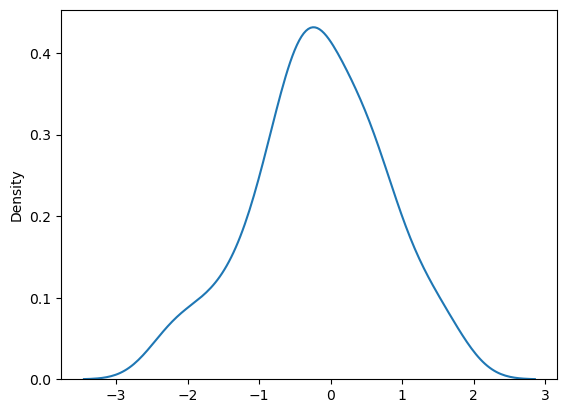

In [10]:
sns.kdeplot(x)

Something like a `bell curve`. 

The suprising thing about scaling, we just scale values, we do not change the core meaning of the values. For example. if we scale the values and then plot the graph. only the range of axis will change, not how the graph looks like. means the semantic meaning retains in the graph. 

# 1.1 | Standard Scaler From Scratch

Lets assume we have this array 

In [11]:
x = np.array([x**2 for x in range(100)])

In [12]:
x

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])

And the graph looks like this 

<AxesSubplot:ylabel='Density'>

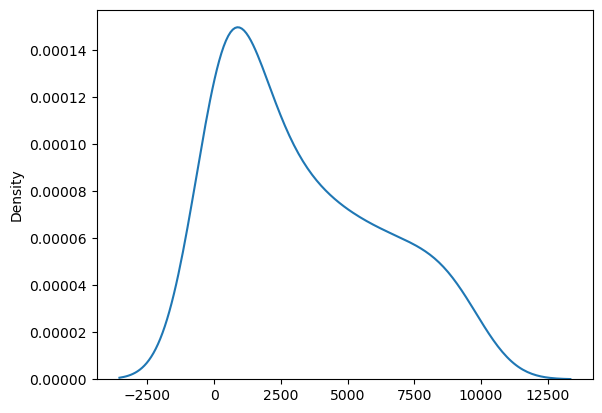

In [13]:
sns.kdeplot(x)

According to this formula 
****
$$x_{i_{scaled}} = \frac {x_i - \mu}{\sigma}$$
****

The mean $\mu$ of the data will be, and the standard deviation $\sigma$ will be  

In [14]:
x.mean() , x.std()

(3283.5, 2953.2966410436998)

You can notice that the $mean(\mu)$ and $standard_-deviation(\sigma)$ are no close to what should there be. Lets try to apply the formula, and see what we get from there 

In [15]:
y = np.empty(shape = (100))
for i,j in enumerate(x):
    y[i] = (j - x.mean()) / (x.std())

In [16]:
y

array([-1.1118084 , -1.11146979, -1.11045398, -1.10876095, -1.10639072,
       -1.10334328, -1.09961863, -1.09521677, -1.0901377 , -1.08438142,
       -1.07794793, -1.07083723, -1.06304932, -1.05458421, -1.04544188,
       -1.03562235, -1.0251256 , -1.01395165, -1.00210049, -0.98957211,
       -0.97636653, -0.96248374, -0.94792374, -0.93268653, -0.91677211,
       -0.90018048, -0.88291165, -0.8649656 , -0.84634234, -0.82704188,
       -0.8070642 , -0.78640932, -0.76507723, -0.74306792, -0.72038141,
       -0.69701769, -0.67297676, -0.64825862, -0.62286327, -0.59679071,
       -0.57004094, -0.54261396, -0.51450978, -0.48572838, -0.45626978,
       -0.42613396, -0.39532094, -0.36383071, -0.33166326, -0.29881861,
       -0.26529675, -0.23109768, -0.1962214 , -0.16066791, -0.12443721,
       -0.0875293 , -0.04994419, -0.01168186,  0.02725767,  0.06687442,
        0.10716837,  0.14813954,  0.18978791,  0.23211349,  0.27511628,
        0.31879629,  0.3631535 ,  0.40818792,  0.45389954,  0.50

<AxesSubplot:ylabel='Density'>

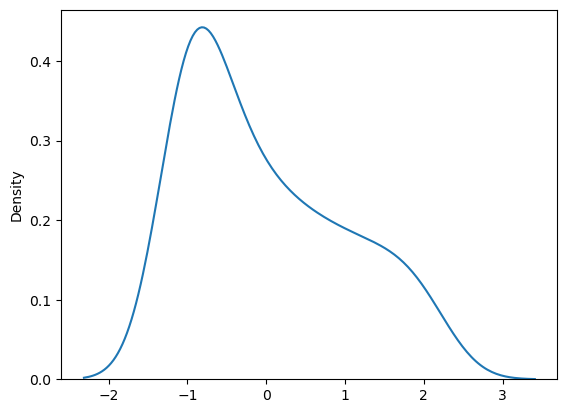

In [17]:
sns.kdeplot(y)

Notice how the semantic meaning of the values have not been changed, and if we see the `mean` and `std` of the scaled values 

In [18]:
y.mean() , y.std()

(8.881784197001253e-18, 1.0)

These values are really good the $mean ~ 0$ and the $std = 1$...

# 1.2 | Functionalities

* ✅`copy : bool, default=True` - If False, try to avoid a copy and do inplace scaling instead. This is not guaranteed to always work inplace; e.g. if the data is not a NumPy array or scipy.sparse CSR matrix, a copy may still be returned. 

# 1.2.1 | Copy

Inplace operations in machine learning can significantly reduce memory usage and improve the computational efficiency of algorithms. By performing calculations directly on the existing data structures rather than creating new ones, inplace operations can help prevent memory errors and reduce the likelihood of memory overflow. Inplace operations are particularly useful in deep learning, where large amounts of data are processed, and computational efficiency is crucial for achieving good performance. 

For doing so we just need not to make the `y` array and rather do the changes in the original array itself

In [19]:
def standard_scaler(array , copy = True):
    if copy:
        y = np.empty(shape = array.shape)
        for i,j in enumerate(array):
            y[i] = (j - array.mean()) / (array.std())
        return y
    else :
        for i,j in enumerate(array):
            array[i] = (j - array.mean()) / (array.std())
        return array

# 1.3 | Standard Scaler Final Scource Code

In [20]:
def standard_scaler(array , copy = True):
    if copy:
        
        y = np.empty(shape = array.shape)
        
        for i,j in enumerate(array):
            
            y[i] = (j - array.mean()) / (array.std())
        
        return y
    
    else :
        
        for i,j in enumerate(array):
            
            array[i] = (j - array.mean()) / (array.std())
        
        return array

# 2 | Min Max Scaler 
Another technique we can apply is to use the formula like this 

****
$$x_{i_{scaled}} = \frac {x_i - min}{max - min}$$
****
Lets assume we have the same array 

In [21]:
x = np.array([x**2 for x in range(100)])
x

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])

And the graph looks like this

<AxesSubplot:ylabel='Density'>

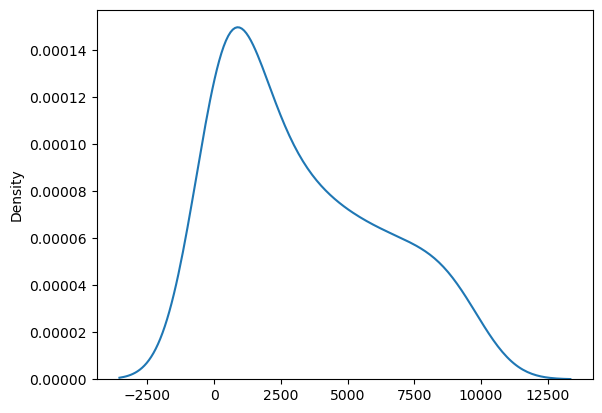

In [22]:
sns.kdeplot(x)

According to this formula 
****
$$x_{i_{scaled}} = \frac {x_i - min}{max - min}$$
****

The mean $\mu$ of the data will be, and the standard deviation $\sigma$ will be  

In [23]:
x.mean() , x.std()

(3283.5, 2953.2966410436998)

You can notice that the $mean(\mu)$ and $standard_-deviation(\sigma)$ are no close to what should there be. Lets try to apply the formula, and see what we get from there 

In [24]:
y = np.empty(shape = (100))
for i,j in enumerate(x):
    y[i] = (j - x.min()) / (x.max() - x.min())
y

array([0.00000000e+00, 1.02030405e-04, 4.08121620e-04, 9.18273646e-04,
       1.63248648e-03, 2.55076013e-03, 3.67309458e-03, 4.99948985e-03,
       6.52994592e-03, 8.26446281e-03, 1.02030405e-02, 1.23456790e-02,
       1.46923783e-02, 1.72431385e-02, 1.99979594e-02, 2.29568411e-02,
       2.61197837e-02, 2.94867871e-02, 3.30578512e-02, 3.68329762e-02,
       4.08121620e-02, 4.49954086e-02, 4.93827160e-02, 5.39740843e-02,
       5.87695133e-02, 6.37690032e-02, 6.89725538e-02, 7.43801653e-02,
       7.99918376e-02, 8.58075707e-02, 9.18273646e-02, 9.80512193e-02,
       1.04479135e-01, 1.11111111e-01, 1.17947148e-01, 1.24987246e-01,
       1.32231405e-01, 1.39679625e-01, 1.47331905e-01, 1.55188246e-01,
       1.63248648e-01, 1.71513111e-01, 1.79981635e-01, 1.88654219e-01,
       1.97530864e-01, 2.06611570e-01, 2.15896337e-01, 2.25385165e-01,
       2.35078053e-01, 2.44975003e-01, 2.55076013e-01, 2.65381084e-01,
       2.75890215e-01, 2.86603408e-01, 2.97520661e-01, 3.08641975e-01,
      

<AxesSubplot:ylabel='Density'>

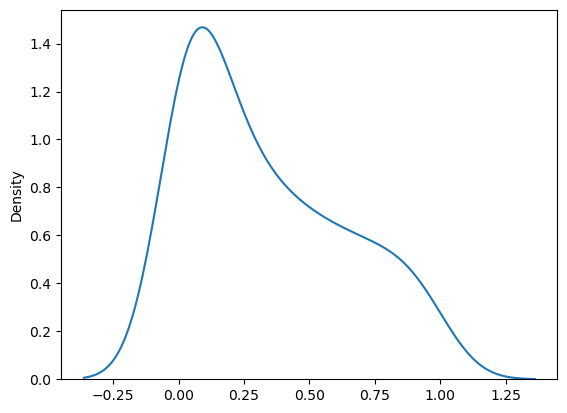

In [25]:
sns.kdeplot(y)

Notice how the semantic meaning of the values have not been changed, and if we see the `mean` and `std` of the scaled values 

In [26]:
y.mean() , y.std()

(0.335016835016835, 0.3013260525501173)

These values are really good the $mean ~ 0$ and the $std = 1$...

# 2.2 | Functionalities

* ✅`copy : bool, default=True` - If False, try to avoid a copy and do inplace scaling instead. This is not guaranteed to always work inplace; e.g. if the data is not a NumPy array or scipy.sparse CSR matrix, a copy may still be returned. 

# 2.2.1 | Copy

Inplace operations in machine learning can significantly reduce memory usage and improve the computational efficiency of algorithms. By performing calculations directly on the existing data structures rather than creating new ones, inplace operations can help prevent memory errors and reduce the likelihood of memory overflow. Inplace operations are particularly useful in deep learning, where large amounts of data are processed, and computational efficiency is crucial for achieving good performance. 

For doing so we just need not to make the `y` array and rather do the changes in the original array itself

In [27]:
def min_max_scaler(array , copy = True):
    if copy:
        y = np.empty(shape = array.shape)
        for i,j in enumerate(array):
            y[i] = (j - array.min()) / (y.max() - y.min())
        return y
    else :
        for i,j in enumerate(array):
            array[i] = (j - array.min()) / (array.max() - array.min())
        return array

# 2.3 | Standard Scaler Final Scource Code

In [28]:
def min_max_scaler(array , copy = True):
    
    if copy:
        
        y = np.empty(shape = array.shape)
        
        for i,j in enumerate(array):
            
            y[i] = (j - array.min()) / (y.max() - y.min())
        
        return y
    
    else :
        
        for i,j in enumerate(array):
            
            array[i] = (j - array.min()) / (array.max() - array.min())
        
        return array